# Imports

In [432]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, Eq
%config InlineBackend.figure_format='retina'

#Internal Functions

In [433]:
def valueGen(eq, x_min, x_max, buckets):
    ## Creating Lookup table
    x = []
    step = float((x_max - x_min) / buckets)
    
    for i in range(buckets + 1):
        x.append(x_min + i * step)

    y = [eq(val) for val in x]
    return {"x": x, "y": y, "step": step}

In [434]:
def linearize(X,Y):
  slopes = []
  intercepts = []

  ## Creating Linear Functions
  for i, x in enumerate(X):
    if(i == len(X)-1):
      break
    slopes.append((Y[i+1] - Y[i])/(X[i+1] - x))
    intercepts.append(Y[i] - slopes[i]*x)
  
  return {"slopes": slopes,"intercepts":intercepts}

In [435]:
def evaluate(slopes,intercepts,x_min,step,value):
  idx = int((value-x_min)/step)
  if idx > len(slopes)-1:
    idx = len(slopes)-1
  slope = slopes[idx]
  intercept = intercepts[idx]

  return slope*value+intercept

In [436]:
def linearizer(eq,x_min,x_max,buckets):
  values = valueGen(eq,x_min,x_max,buckets)
  weights = linearize(values['x'],values['y'])
  x = np.linspace(x_min,x_max,100)
  y = [evaluate(weights['slopes'],weights['intercepts'],x_min,values['step'],x) for x in x]
  return {'x':x,'y':y}

# Calling Function

In [437]:
def fn(x):
  return x**3
output = linearizer(fn,-20,20,5)

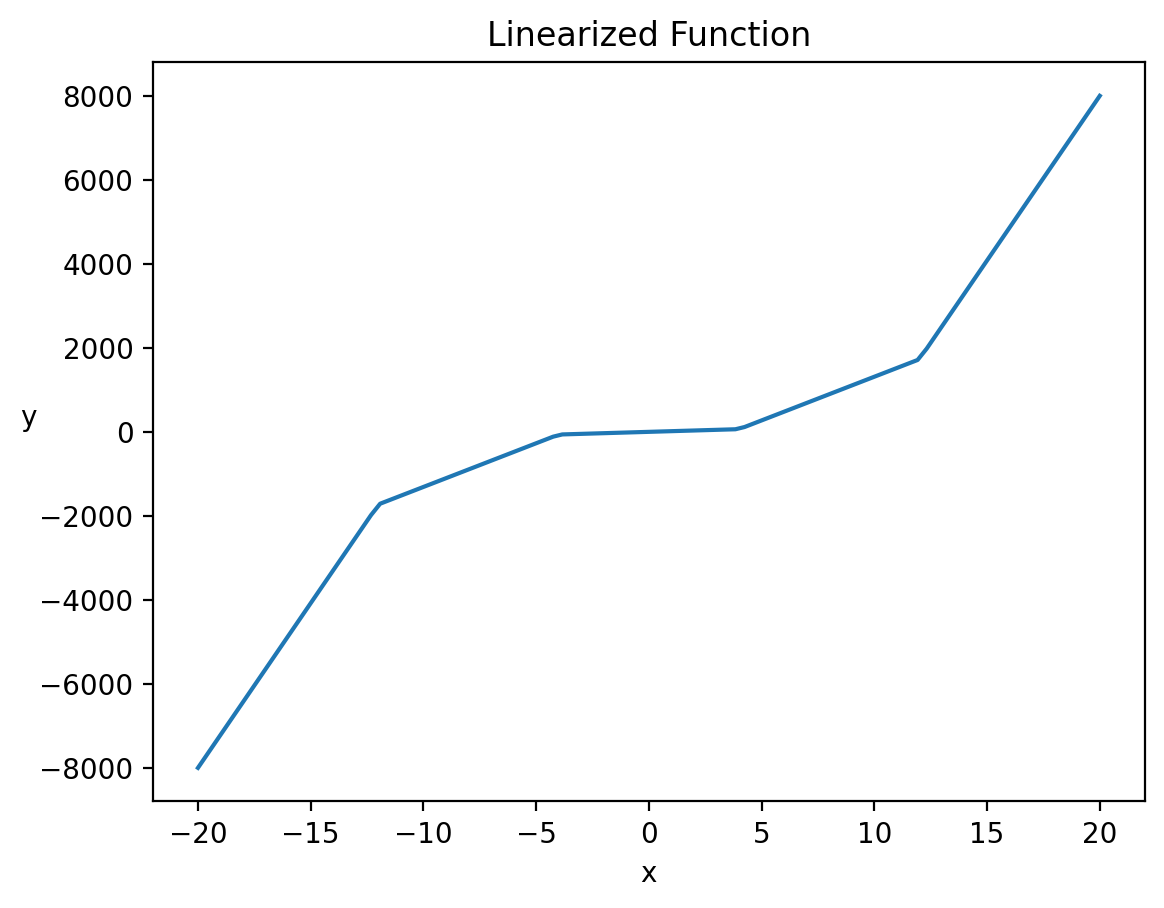

In [438]:
df = pd.DataFrame.from_dict(output)
df.plot(x = 'x',y = 'y')
plt.title('Linearized Function')
plt.xlabel('x')
plt.ylabel('y', rotation = 0)
plt.legend().remove()